In [8]:
import ast
import re

import graphviz
import pandas as pd

# Parse from Church a-list to DataFrame

In [9]:
def _parse_node(data: str):
    """Converts data in the following format to a Python dict.

    Input:
    ((person-id . person-0) (name . dana) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2))
    
    Output:
    [{"person-id": "person-0", "name": "dana", "gender": "male", "parent-1-id": None, "parent-2-id": None, "partner-id": "person-1", "child-ids": ["person-2"]}]
    """
    data = data[1:-1]
    data = re.split("\(([^\)]+)\)", data)
    data = list(filter(lambda x: x.strip(" "), data))
    data = [[x for x in item.split(" ") if x != "."] for item in data]
    
    data_dict = []
    for item in data:
        if len(item) == 1:
            obj = {item[0]: ""}
        elif len(item) == 2:
            if item[0] == "child-ids":
                obj = {item[0]: item[1:]}
            else:
                obj = {item[0]: item[1]}
        elif len(item) > 2:
            obj = {item[0]: item[1:]}
        data_dict.append(obj)
    
    data = data_dict
    data = {k: v for d in data for k, v in d.items()}
    return data

def _parse_all_nodes(data: str):
    data = data[1:-1]
    data = [("((person-id" + x).strip() for x in data.split("((person-id")][1:]
    data = list(map(_parse_node, data))
    return data

def parse(data: str):
    df = pd.DataFrame(_parse_all_nodes(T))
    df = df.set_index("person-id")
    df = df.fillna("")
    return df

## Some example trees

In [10]:
# Avery's brother has a daughter whose partner is named Blake
T = "(((person-id . person-0) (name . person-0) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-6)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-6)) ((person-id . person-2) (name . dana) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . charlie) (gender . female) (parent-1-id . person-2) (parent-2-id . person-3) (partner-id . person-5) (child-ids)) ((person-id . person-5) (name . blake) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-4) (child-ids)) ((person-id . person-6) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)))"

In [11]:
# length T > 10
T = "(((person-id . person-0) (name . blake) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-4 person-6)) ((person-id . person-1) (name . dana) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-4 person-6)) ((person-id . person-2) (name . person-2) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids)) ((person-id . person-3) (name . person-3) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids)) ((person-id . person-4) (name . avery) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-5) (child-ids)) ((person-id . person-5) (name . person-5) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-4) (child-ids)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-7) (child-ids person-8 person-9)) ((person-id . person-7) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-6) (child-ids person-8 person-9)) ((person-id . person-8) (name . person-8) (gender . male) (parent-1-id . person-6) (parent-2-id . person-7)) ((person-id . person-9) (name . person-9) (gender . male) (parent-1-id . person-6) (parent-2-id . person-7) (partner-id . person-10) (child-ids)) ((person-id . person-10) (name . person-10) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-9) (child-ids)))"

In [12]:
df = parse(T)
df

,name,gender,parent-1-id,parent-2-id,partner-id,child-ids
person-id,,,,,,
person-0,blake,female,,,person-1,"[person-2, person-4, person-6]"
person-1,dana,male,,,person-0,"[person-2, person-4, person-6]"
person-2,person-2,female,person-0,person-1,person-3,
person-3,person-3,female,,,person-2,
person-4,avery,male,person-0,person-1,person-5,
person-5,person-5,female,,,person-4,
person-6,person-6,female,person-0,person-1,person-7,"[person-8, person-9]"
person-7,charlie,male,,,person-6,"[person-8, person-9]"
person-8,person-8,male,person-6,person-7,,


In [15]:
T = "(((person-id . person-0) (name . person-0) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-7 person-8)) ((person-id . person-1) (name . charlie) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-7 person-8)) ((person-id . person-2) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4 person-6)) ((person-id . person-3) (name . person-3) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4 person-6)) ((person-id . person-4) (name . dana) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3) (partner-id . person-5) (child-ids)) ((person-id . person-5) (name . person-5) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-4) (child-ids)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-7) (name . person-7) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-8) (name . avery) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1)))"

# Render tree with GraphViz

In [16]:
def make_dot(df):
    dot = graphviz.Digraph('kinship', comment='Family tree', graph_attr = {'splines': 'ortho'})

    nodes = set()

    for person_id, row in df.iterrows():    
        with dot.subgraph() as s:
            # People are constrained to be on the same row as their partner
            s.attr(rank='same')

            node_name = row["name"]
            if node_name.startswith("person-"):
                node_name = ""
                node_style = "dashed"
            else:
                node_name = node_name.capitalize()
                node_style = "solid"

            if row["gender"] == "male":
                node_color = "blue"
            else:
                node_color = "green"

            # Add a node for each person
            s.node(person_id, node_name, shape="box", style=node_style, color=node_color, fontcolor=node_color, fontname="verdana-bold", penwidth="2")
            nodes.add(person_id)

            # A "partnership" node goes between two partners
            partner_id = row["partner-id"]
            if row["partner-id"]:
                if row["partner-id"] not in nodes:
                    partnership = f"partnership_{person_id}_{partner_id}"
                    s.node(partnership, "", shape="diamond", style="filled", height=".1", width=".1")
                    s.edge(person_id, partnership, arrowhead="none")
                else:
                    partnership = f"partnership_{partner_id}_{person_id}"
                    s.edge(partnership, person_id, arrowhead="none")


        if row["partner-id"] not in nodes and row["child-ids"]:

            # Couple has multiple children
            if len(row["child-ids"]) > 1:

                # Hidden "children" node goes between partnership node and each child node
                children = f"children_{person_id}_{partner_id}"
                dot.node(children, "", shape="point", style="invis", height=".001", width=".001")
                dot.edge(partnership, children, arrowhead="none")

                # Add an edge for each child
                for child_id in row["child-ids"]:
                    dot.edge(children, child_id, headport="_", arrowhead="none")

            # Couple has one child
            else:
                # Edge directly from partnership to child
                dot.edge(partnership, row["child-ids"][0], headport="_", arrowhead="none")
                
    return dot

def render(data):
    return make_dot(parse(data))

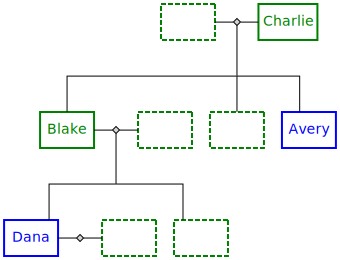

In [17]:
render(T)

# Examples in paper

### Avery has a sister named Blake
`(sister-of? 'blake 'avery)`

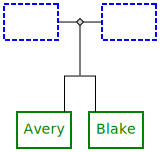

In [18]:
T = "(((person-id . person-0) (name . person-0) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-3)) ((person-id . person-1) (name . person-1) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-3)) ((person-id . person-2) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-3) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)))"
render(T)

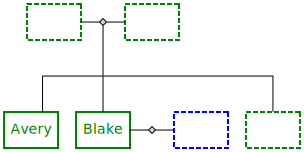

In [19]:
T = "(((person-id . person-0) (name . person-0) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-3 person-5)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-3 person-5)) ((person-id . person-2) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-3) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-4) (child-ids)) ((person-id . person-4) (name . person-4) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-3) (child-ids)) ((person-id . person-5) (name . person-5) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)))"
render(T)

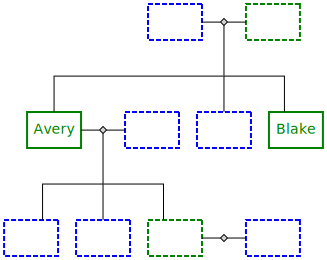

In [20]:
T = "(((person-id . person-0) (name . person-0) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-8 person-9)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-8 person-9)) ((person-id . person-2) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4 person-5 person-6)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4 person-5 person-6)) ((person-id . person-4) (name . person-4) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-5) (name . person-5) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id . person-2) (parent-2-id . person-3) (partner-id . person-7) (child-ids)) ((person-id . person-7) (name . person-7) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-6) (child-ids)) ((person-id . person-8) (name . person-8) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-9) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)))"
render(T)

### Avery and Blake's father is named Charlie
`(and (father-of? 'charlie 'avery) (father-of? 'charlie 'blake))`

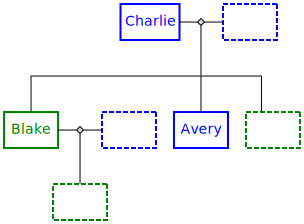

In [21]:
T = "(((person-id . person-0) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-5 person-6)) ((person-id . person-1) (name . person-1) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-5 person-6)) ((person-id . person-2) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . person-4) (gender . female) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-5) (name . avery) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)))"
render(T)

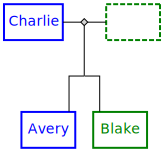

In [22]:
T = "(((person-id . person-0) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-3)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-3)) ((person-id . person-2) (name . avery) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-3) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)))"
render(T)

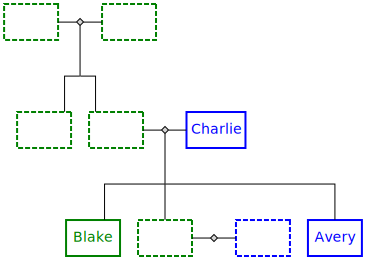

In [23]:
T = "(((person-id . person-0) (name . person-0) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-3)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-3)) ((person-id . person-2) (name . person-2) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-3) (name . person-3) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-4) (child-ids person-5 person-6 person-8)) ((person-id . person-4) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-3) (child-ids person-5 person-6 person-8)) ((person-id . person-5) (name . blake) (gender . female) (parent-1-id . person-3) (parent-2-id . person-4)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id . person-3) (parent-2-id . person-4) (partner-id . person-7) (child-ids)) ((person-id . person-7) (name . person-7) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-6) (child-ids)) ((person-id . person-8) (name . avery) (gender . male) (parent-1-id . person-3) (parent-2-id . person-4)))"
render(T)

### Charlie is the grandfather of Dana
`(grandfather-of? 'charlie 'dana)`

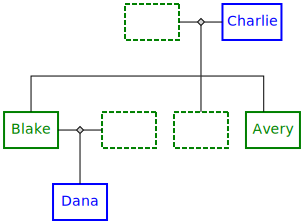

In [24]:
T = "(((person-id . person-0) (name . person-0) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-5 person-6)) ((person-id . person-1) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-5 person-6)) ((person-id . person-2) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . dana) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-5) (name . person-5) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-6) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)))"
render(T)

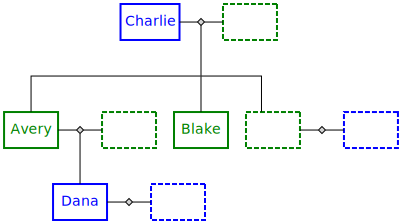

In [25]:
T = "(((person-id . person-0) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-6 person-7)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-6 person-7)) ((person-id . person-2) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . dana) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3) (partner-id . person-5) (child-ids)) ((person-id . person-5) (name . person-5) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-4) (child-ids)) ((person-id . person-6) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-7) (name . person-7) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-8) (child-ids)) ((person-id . person-8) (name . person-8) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-7) (child-ids)))"
render(T)

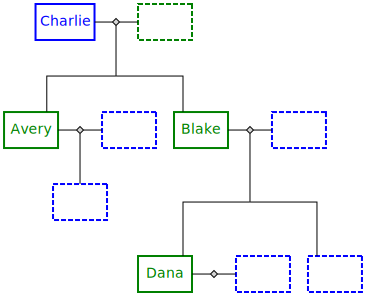

In [26]:
T = "(((person-id . person-0) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-5)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-5)) ((person-id . person-2) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . person-4) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-5) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-6) (child-ids person-7 person-9)) ((person-id . person-6) (name . person-6) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-5) (child-ids person-7 person-9)) ((person-id . person-7) (name . dana) (gender . female) (parent-1-id . person-5) (parent-2-id . person-6) (partner-id . person-8) (child-ids)) ((person-id . person-8) (name . person-8) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-7) (child-ids)) ((person-id . person-9) (name . person-9) (gender . male) (parent-1-id . person-5) (parent-2-id . person-6)))"
render(T)

### Blake has two kids
`(= (length (children-of 'blake)) 2)`

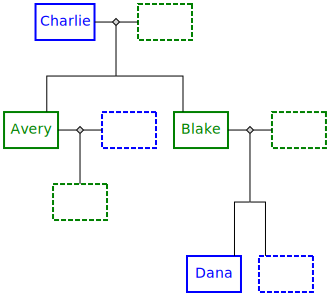

In [27]:
T = "(((person-id . person-0) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-5)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-5)) ((person-id . person-2) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . person-4) (gender . female) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-5) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-6) (child-ids person-7 person-8)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-5) (child-ids person-7 person-8)) ((person-id . person-7) (name . dana) (gender . male) (parent-1-id . person-5) (parent-2-id . person-6)) ((person-id . person-8) (name . person-8) (gender . male) (parent-1-id . person-5) (parent-2-id . person-6)))"
render(T)

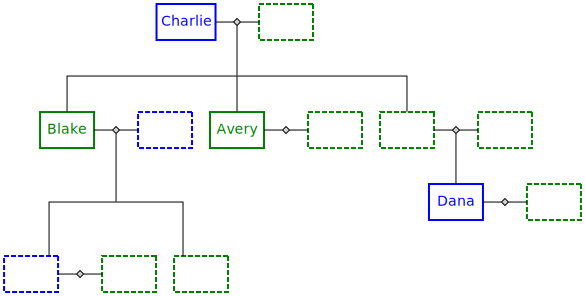

In [28]:
T = "(((person-id . person-0) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-7 person-9)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-7 person-9)) ((person-id . person-2) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4 person-6)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4 person-6)) ((person-id . person-4) (name . person-4) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3) (partner-id . person-5) (child-ids)) ((person-id . person-5) (name . person-5) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-4) (child-ids)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-7) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-8) (child-ids)) ((person-id . person-8) (name . person-8) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-7) (child-ids)) ((person-id . person-9) (name . person-9) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-10) (child-ids person-11)) ((person-id . person-10) (name . person-10) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-9) (child-ids person-11)) ((person-id . person-11) (name . dana) (gender . male) (parent-1-id . person-9) (parent-2-id . person-10) (partner-id . person-12) (child-ids)) ((person-id . person-12) (name . person-12) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-11) (child-ids)))"
render(T)

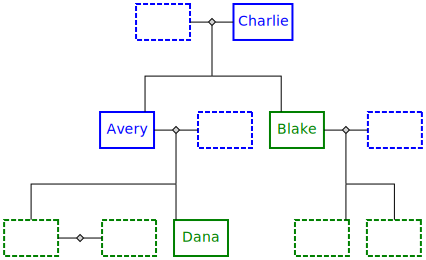

In [29]:
# ...where Avery is the parent of Dana
T = "(((person-id . person-0) (name . person-0) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-7)) ((person-id . person-1) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-7)) ((person-id . person-2) (name . avery) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4 person-6)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4 person-6)) ((person-id . person-4) (name . dana) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3) (partner-id . person-5) (child-ids)) ((person-id . person-5) (name . person-5) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-4) (child-ids)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-7) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-8) (child-ids person-9 person-10)) ((person-id . person-8) (name . person-8) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-7) (child-ids person-9 person-10)) ((person-id . person-9) (name . person-9) (gender . female) (parent-1-id . person-7) (parent-2-id . person-8)) ((person-id . person-10) (name . person-10) (gender . male) (parent-1-id . person-7) (parent-2-id . person-8)))"
T = "(((person-id . person-0) (name . person-0) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-7)) ((person-id . person-1) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-7)) ((person-id . person-2) (name . avery) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4 person-6)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4 person-6)) ((person-id . person-4) (name . person-4) (gender . female) (parent-1-id . person-2) (parent-2-id . person-3) (partner-id . person-5) (child-ids)) ((person-id . person-5) (name . person-5) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-4) (child-ids)) ((person-id . person-6) (name . dana) (gender . female) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-7) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-8) (child-ids person-9 person-10)) ((person-id . person-8) (name . person-8) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-7) (child-ids person-9 person-10)) ((person-id . person-9) (name . person-9) (gender . female) (parent-1-id . person-7) (parent-2-id . person-8)) ((person-id . person-10) (name . person-10) (gender . female) (parent-1-id . person-7) (parent-2-id . person-8)))"


render(T)

### Dana is an only child
`(not (exists (lambda (x) (sibling-of? x 'dana))))`

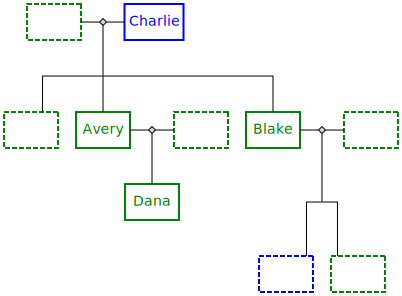

In [30]:
T = "(((person-id . person-0) (name . person-0) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-3 person-6)) ((person-id . person-1) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-3 person-6)) ((person-id . person-2) (name . person-2) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-3) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-4) (child-ids person-5)) ((person-id . person-4) (name . person-4) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-3) (child-ids person-5)) ((person-id . person-5) (name . dana) (gender . female) (parent-1-id . person-3) (parent-2-id . person-4)) ((person-id . person-6) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-7) (child-ids person-8 person-9)) ((person-id . person-7) (name . person-7) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-6) (child-ids person-8 person-9)) ((person-id . person-8) (name . person-8) (gender . male) (parent-1-id . person-6) (parent-2-id . person-7)) ((person-id . person-9) (name . person-9) (gender . female) (parent-1-id . person-6) (parent-2-id . person-7)))"
render(T)

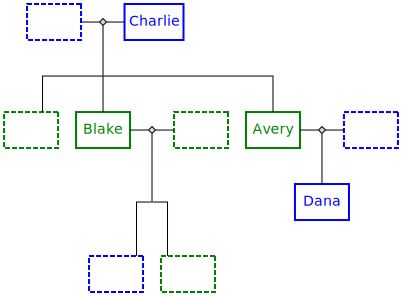

In [31]:
T = "(((person-id . person-0) (name . person-0) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-3 person-7)) ((person-id . person-1) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-3 person-7)) ((person-id . person-2) (name . person-2) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-3) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-4) (child-ids person-5 person-6)) ((person-id . person-4) (name . person-4) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-3) (child-ids person-5 person-6)) ((person-id . person-5) (name . person-5) (gender . male) (parent-1-id . person-3) (parent-2-id . person-4)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id . person-3) (parent-2-id . person-4)) ((person-id . person-7) (name . avery) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-8) (child-ids person-9)) ((person-id . person-8) (name . person-8) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-7) (child-ids person-9)) ((person-id . person-9) (name . dana) (gender . male) (parent-1-id . person-7) (parent-2-id . person-8)))"
render(T)

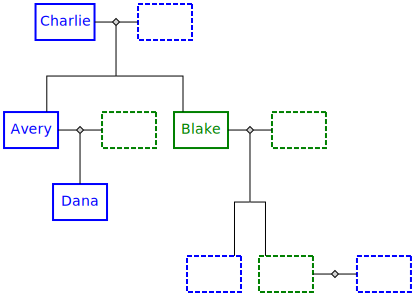

In [32]:
T = "(((person-id . person-0) (name . charlie) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-5)) ((person-id . person-1) (name . person-1) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-5)) ((person-id . person-2) (name . avery) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . dana) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-5) (name . blake) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-6) (child-ids person-7 person-8)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-5) (child-ids person-7 person-8)) ((person-id . person-7) (name . person-7) (gender . male) (parent-1-id . person-5) (parent-2-id . person-6)) ((person-id . person-8) (name . person-8) (gender . female) (parent-1-id . person-5) (parent-2-id . person-6) (partner-id . person-9) (child-ids)) ((person-id . person-9) (name . person-9) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-8) (child-ids)))"
render(T)

# Winnemucca family tree

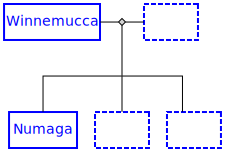

In [65]:
# Condition: According to historical records, Chief Winnemucca was either the father or uncle of Numaga.
T = "(((person-id . person-0) (name . person-0) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2)) ((person-id . person-1) (name . winnemucca) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2)) ((person-id . person-2) (name . numaga) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids)))"
T = "(((person-id . person-0) (name . winnemucca) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-3)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-3)) ((person-id . person-2) (name . numaga) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1)))"
T = "(((person-id . person-0) (name . person-0) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-5 person-6)) ((person-id . person-1) (name . person-1) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-5 person-6)) ((person-id . person-2) (name . person-2) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . numaga) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-5) (name . winnemucca) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-6) (name . person-6) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1)))"
render(T)

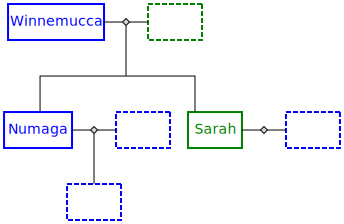

In [73]:
# Condition: Numaga's son would have called Sarah Winnemucca his “pāan’i”.
T = "(((person-id . person-0) (name . person-0) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-6)) ((person-id . person-1) (name . winnemucca) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-6)) ((person-id . person-2) (name . numaga) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . person-4) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3) (partner-id . person-5) (child-ids)) ((person-id . person-5) (name . person-5) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-4) (child-ids)) ((person-id . person-6) (name . sarah) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-7) (child-ids)) ((person-id . person-7) (name . person-7) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-6) (child-ids)))"
T = "(((person-id . person-0) (name . winnemucca) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-5)) ((person-id . person-1) (name . person-1) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-5)) ((person-id . person-2) (name . numaga) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . person-4) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3)) ((person-id . person-5) (name . sarah) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-6) (child-ids)) ((person-id . person-6) (name . person-6) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-5) (child-ids)))"
T = "(((person-id . person-0) (name . natchez) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-3)) ((person-id . person-1) (name . winnemucca) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-3)) ((person-id . person-2) (name . sarah) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-3) (name . numaga) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-4) (child-ids person-5 person-6)) ((person-id . person-4) (name . person-4) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-3) (child-ids person-5 person-6)) ((person-id . person-5) (name . person-5) (gender . male) (parent-1-id . person-3) (parent-2-id . person-4)) ((person-id . person-6) (name . person-6) (gender . female) (parent-1-id . person-3) (parent-2-id . person-4)))"
render(T)

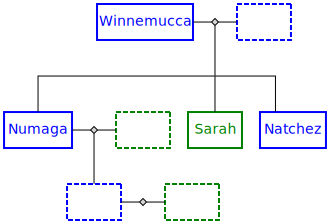

In [71]:
# Condition: Sarah had a sibling named Natchez.
T = "(((person-id . person-0) (name . person-0) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-3 person-7)) ((person-id . person-1) (name . winnemucca) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-3 person-7)) ((person-id . person-2) (name . natchez) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-3) (name . numaga) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-4) (child-ids person-5 person-6)) ((person-id . person-4) (name . person-4) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-3) (child-ids person-5 person-6)) ((person-id . person-5) (name . person-5) (gender . female) (parent-1-id . person-3) (parent-2-id . person-4)) ((person-id . person-6) (name . person-6) (gender . male) (parent-1-id . person-3) (parent-2-id . person-4)) ((person-id . person-7) (name . sarah) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)))"
T = "(((person-id . person-0) (name . person-0) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-6 person-8)) ((person-id . person-1) (name . winnemucca) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-6 person-8)) ((person-id . person-2) (name . numaga) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . person-4) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3) (partner-id . person-5) (child-ids)) ((person-id . person-5) (name . person-5) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-4) (child-ids)) ((person-id . person-6) (name . sarah) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-7) (child-ids)) ((person-id . person-7) (name . person-7) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-6) (child-ids)) ((person-id . person-8) (name . natchez) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-9) (child-ids)) ((person-id . person-9) (name . person-9) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-8) (child-ids)))"
T = "(((person-id . person-0) (name . winnemucca) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-1) (child-ids person-2 person-6 person-7)) ((person-id . person-1) (name . person-1) (gender . male) (parent-1-id) (parent-2-id) (partner-id . person-0) (child-ids person-2 person-6 person-7)) ((person-id . person-2) (name . numaga) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1) (partner-id . person-3) (child-ids person-4)) ((person-id . person-3) (name . person-3) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-2) (child-ids person-4)) ((person-id . person-4) (name . person-4) (gender . male) (parent-1-id . person-2) (parent-2-id . person-3) (partner-id . person-5) (child-ids)) ((person-id . person-5) (name . person-5) (gender . female) (parent-1-id) (parent-2-id) (partner-id . person-4) (child-ids)) ((person-id . person-6) (name . sarah) (gender . female) (parent-1-id . person-0) (parent-2-id . person-1)) ((person-id . person-7) (name . natchez) (gender . male) (parent-1-id . person-0) (parent-2-id . person-1)))"
render(T)